In [9]:
import pandas as pd
import numpy as np
import altair as alt
import json
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from pathlib import Path

data_path = Path.cwd() / 'listings.csv'  
df1 = pd.read_csv(data_path)

In [10]:
df1.isnull().sum()

df1.drop(['neighbourhood_group'],axis=1, inplace=True)
df1.columns.str
df1.fillna(np.nan)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,27262,"AQA-No7, Great mattress, high speed internet",37177,Emmanouil,ΑΜΠΕΛΟΚΗΠΟΙ,37.989240,23.765000,Entire home/apt,NaN,1,29,2024-11-18,0.19,1,0,4,00002433111
1,33945,Spacious Cosy aprtm very close to Metro!,146553,Katerina,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.006730,23.727750,Entire home/apt,30.0,4,79,2025-03-10,0.45,2,274,10,00000874421
2,49489,Ermou 44 - 3bdr apt in the heart of Athens,225612,Stathis,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.976700,23.730640,Entire home/apt,160.0,2,140,2024-07-14,0.85,1,172,4,00000876484
3,60394,Cosy apartment! Great central Athens location!,290864,Dimitra,ΣΤΑΔΙΟ,37.967380,23.740380,Entire home/apt,50.0,6,35,2024-12-14,0.29,1,86,5,00000508830
4,134340,Neo Pagrati Athens Apartment,659406,Konstantinos,ΠΑΓΚΡΑΤΙ,37.964050,23.749680,Entire home/apt,37.0,3,56,2024-10-11,0.34,1,288,4,00002821300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14982,1377414874247372482,Stylish & Renovated Apartment - Heart of Psirr...,667918545,Blum Holdings And Management Ike,ΘΗΣΕΙΟ,37.976784,23.723201,Entire home/apt,75.0,2,0,NaN,NaN,8,365,0,00003108160
14983,1377425213011835578,Micro Studio - heart of Psirri! A,667918545,Blum Holdings And Management Ike,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.976671,23.723520,Entire home/apt,60.0,2,0,NaN,NaN,8,365,0,00003108027
14984,1377625557051440388,"Sunny 3bd flat,Acropolis view",201512943,Anastasios,ΝΕΟΣ ΚΟΣΜΟΣ,37.962270,23.725760,Entire home/apt,180.0,1,0,NaN,NaN,7,360,0,00003124260
14985,1378781495088816405,Athenian Nook Kolonaki,444906990,Smart Plan,ΚΟΛΩΝΑΚΙ,37.977910,23.739680,Entire home/apt,39.0,1,1,2025-03-18,1.00,34,343,1,00003079053


In [11]:
df1.isnull().sum()


id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             1153
minimum_nights                       0
number_of_reviews                    0
last_review                       2572
reviews_per_month                 2572
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                            208
dtype: int64

In [12]:
reviewed_and_available = df1.loc[
    (df1["number_of_reviews"] > 100) & (df1['availability_365'] > 200)  
    ].sort_values(by="price", ascending=False).head(10)

In [13]:
reviewed_and_available

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
1593,24903281,Plaka's Villa with Breathtaking Acropolis View,111388086,Natasha,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97066,23.73013,Entire home/apt,1275.0,1,108,2025-01-24,1.30,1,239,13,1053114
1330,22825890,Penthouse Heated Pool/AcropolisView/Ideal Loca...,23439759,Marianne,ΘΗΣΕΙΟ,37.97586,23.71692,Entire home/apt,655.0,3,153,2025-01-20,1.77,8,239,23,00003088948
2169,29895521,Grand House-Acropolis 5-Bdr Apt. / Outdoor Jac...,222306652,Stylish Stays,ΑΚΡΟΠΟΛΗ,37.97236,23.72006,Entire home/apt,540.0,2,139,2025-01-12,1.82,10,247,25,00001084139
2076,29119475,"Huge 165sq Apt w/5BDR, 2&halfBath-1min toAcrop...",32601523,Stella And Nikos,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97072,23.73054,Entire home/apt,537.0,1,248,2025-03-08,3.22,25,339,17,00003081296
2519,32983117,The old merchant's house,248231266,Nikolas,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97662,23.72598,Entire home/apt,476.0,2,142,2025-01-28,1.95,1,209,34,00000732384
982,19047757,"Thiseio 1915 - luxury, modern, elegant apts",127976919,1915 Team,ΘΗΣΕΙΟ,37.97567,23.71900,Entire home/apt,456.0,2,161,2024-11-19,1.79,5,256,19,0206Κ13000344701
2760,34384791,Live Your Myth Under The Acropolis@Plaka,254286558,Panos,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97516,23.72541,Entire home/apt,443.0,2,236,2025-03-09,3.35,2,260,55,00002974459
1662,25366643,KARYATIS LUXURY MAISONETTE by K&K,191530509,Evelin,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,37.96686,23.72488,Entire home/apt,434.0,1,223,2025-01-06,2.76,7,215,29,00002834845
496,13086140,Kallimarmaro Residence *****,59700037,Eirini,ΣΤΑΔΙΟ,37.96707,23.73934,Entire home/apt,424.0,2,182,2025-01-04,1.75,1,331,23,00000641565
1358,23034890,"Acropolis Grand Residence, Stunning Views",114156592,Vasileios,ΖΑΠΠΕΙΟ,37.96796,23.73238,Hotel room,414.0,1,193,2025-02-14,2.28,67,273,21,0206E70000698401


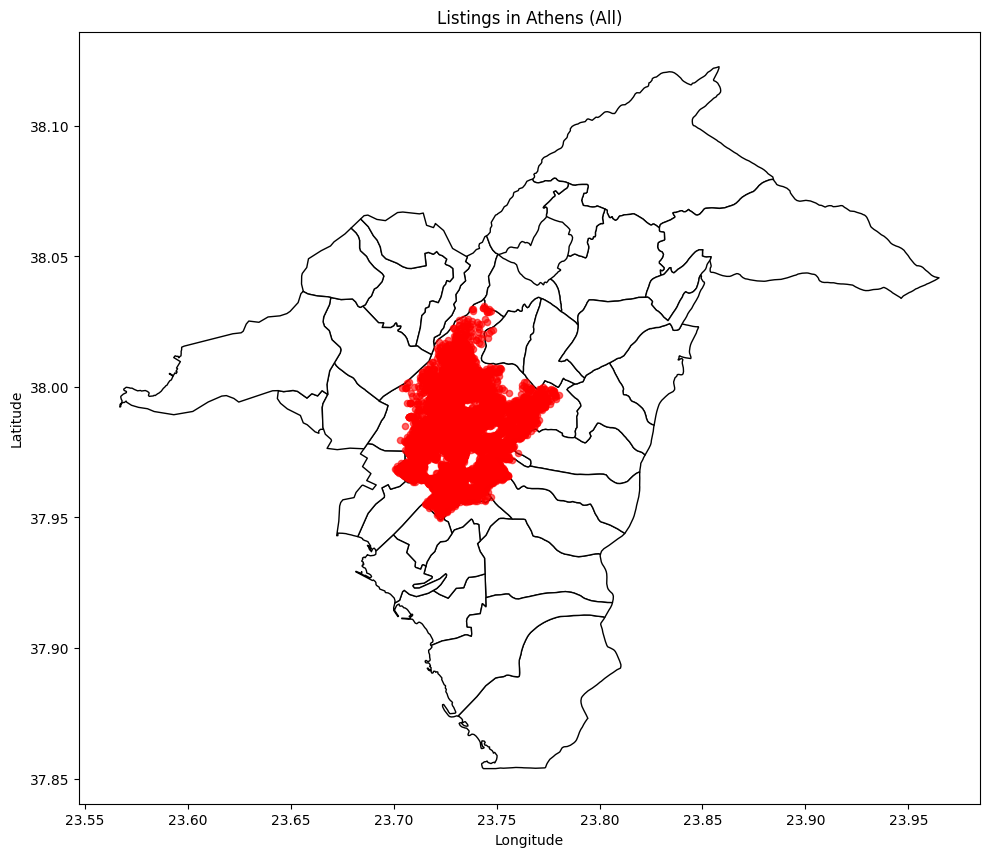

In [ ]:
geodata_path = Path.cwd() / 'athinaion.json'  
gdf_map = gpd.read_file(geodata_path)
gdf_points = gpd.GeoDataFrame(
    df1,
    geometry=gpd.points_from_xy(df1['longitude'], df1['latitude']),
    crs="EPSG:4326"  # WGS84 lat/lon
)

# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the background map
gdf_map.plot(ax=ax, color='white', edgecolor='black')

# Overlay the points
gdf_points.plot(ax=ax, color='red', markersize=20, alpha=0.6)

# Optional: Add title
plt.title("Listings in Athens (All)")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


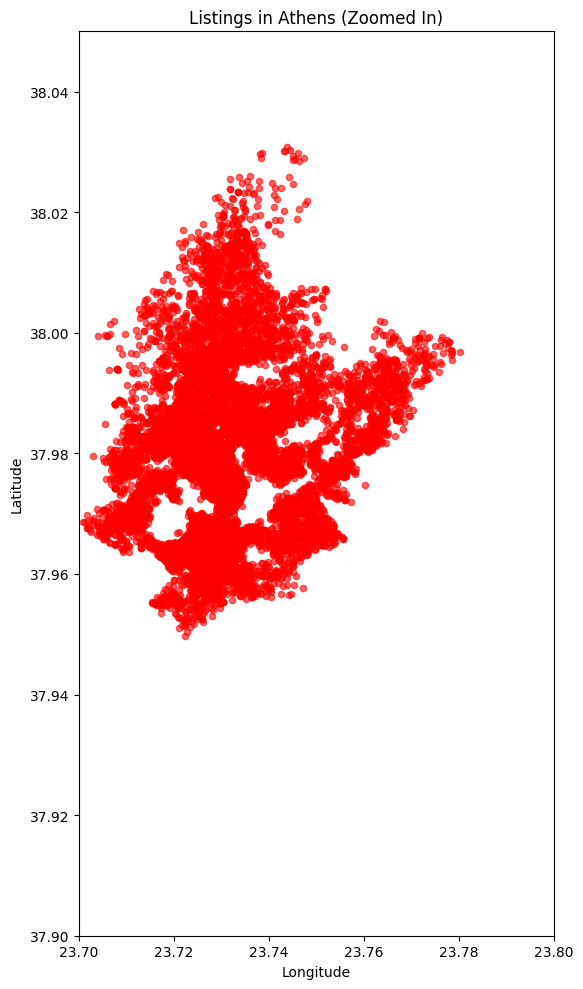

In [ ]:
#zooms in on previous map (this block is temp)
# Load background map
geodata_path2 = Path.cwd() / 'custom.geo.json'
gdf_map2 = gpd.read_file(geodata_path2)
# Your DataFrame with lat/lon
gdf_points = gpd.GeoDataFrame(
    df1,
    geometry=gpd.points_from_xy(df1['longitude'], df1['latitude']),
    crs="EPSG:4326"
)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf_map2.plot(ax=ax, color='white', edgecolor='black')
gdf_points.plot(ax=ax, color='red', markersize=20, alpha=0.6)

# Zoom here
ax.set_xlim(23.7, 23.8)     # Longitude
ax.set_ylim(37.9, 38.05)    # Latitude

plt.title("Listings in Athens (Zoomed In)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


In [8]:
with open('/Users/andreasg/Documents/Python Repository/Athens Airbnb Listings/athinaion.json') as f:
    athens_geo = json.load(f)

# Background map layer
background = alt.Chart(alt.Data(values=athens_geo['features'])).mark_geoshape(
    fill='white',
    stroke='black'
).project('mercator').properties(
    width=600,
    height=400
)

# Overlay points (your listings)
points = alt.Chart(reviewed_and_available).mark_circle(color='red', size=60).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    tooltip=['name','room_type','price','number_of_reviews','minimum_nights']
).project('mercator')

# Combine and display
map_chart = background + points
map_chart.properties(title='Listings in Athens (Near Acropolis)')

alt.LayerChart(...)

In [ ]:
# Set relative path to your JSON file (assuming running from repo root)
json_path = Path.cwd() / 'athinaion.json'

with open(json_path) as f:
    athens_geo = json.load(f)

# Background map layer
background = alt.Chart(alt.Data(values=athens_geo['features'])).mark_geoshape(
    fill='white',
    stroke='black'
).project('mercator').properties(
    width=600,
    height=400
)

# Overlay points (your listings)
points = alt.Chart(reviewed_and_available).mark_circle(color='red', size=60).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    tooltip=['name', 'room_type', 'price', 'number_of_reviews', 'minimum_nights']
).project('mercator')

# Combine and display
map_chart = background + points
map_chart.properties(title='Listings in Athens (Near Acropolis)')


alt.LayerChart(...)

In [9]:
df1.nlargest(30, 'price')

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
13377,1290327953559183613,Appartment_near_Ippokrateion,110816511,Petros,ΑΜΠΕΛΟΚΗΠΟΙ,37.984218,23.758705,Entire home/apt,13680.0,1,0,NaN,NaN,1,365,0,00003049520
11194,1162338718376503166,Unique 5th floor loft,579045535,Konstantinos,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.981965,23.725050,Entire home/apt,13500.0,1,9,2024-10-20,0.96,1,270,9,00002581745
12859,1257209087618837736,Exarchia gemütliche Wohnung,577475913,Bahira,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.988982,23.736003,Entire home/apt,9999.0,1,0,NaN,NaN,1,0,0,Exempt
7874,903465682403602485,Nike s Katechaki,496923847,Holidu,ΕΛΛΗΝΟΡΩΣΩΝ,37.995219,23.771115,Entire home/apt,9143.0,1,3,2023-06-17,0.14,1,365,0,00002093114
8217,927564829389102058,Art House In Athens,447681166,Michael,ΓΚΥΖΗ,37.988984,23.749441,Entire home/apt,9000.0,1,1,2023-09-23,0.06,1,365,0,00000021806
8573,954852338025119049,Kazi Home 1,513244919,Holidu,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.009287,23.728443,Entire home/apt,9000.0,1,7,2025-01-01,0.37,4,364,5,00002403429
8574,954852385775269403,Kazi Home 4,513244919,Holidu,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.009287,23.728443,Entire home/apt,9000.0,1,14,2024-10-28,0.78,4,364,9,00002403408
8575,954852591366256728,Kazi Home 2,513244919,Holidu,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.009287,23.728443,Entire home/apt,9000.0,1,3,2025-02-09,0.18,4,365,2,00002403349
8576,954852605998048706,Kazi Home 3,513244919,Holidu,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.009287,23.728443,Entire home/apt,9000.0,1,6,2024-07-24,0.33,4,365,4,00002403396
9104,1015771770868098586,Kazi Home 5,521068750,Holidu,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.009287,23.728443,Entire home/apt,9000.0,1,5,2025-02-15,0.30,1,365,4,00002403328


In [10]:
df1.query('price >= 9000 & room_type == "Entire home/apt"').sort_values(by = 'price', ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
13377,1290327953559183613,Appartment_near_Ippokrateion,110816511,Petros,ΑΜΠΕΛΟΚΗΠΟΙ,37.984218,23.758705,Entire home/apt,13680.0,1,0,NaN,NaN,1,365,0,00003049520
11194,1162338718376503166,Unique 5th floor loft,579045535,Konstantinos,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.981965,23.725050,Entire home/apt,13500.0,1,9,2024-10-20,0.96,1,270,9,00002581745
12859,1257209087618837736,Exarchia gemütliche Wohnung,577475913,Bahira,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.988982,23.736003,Entire home/apt,9999.0,1,0,NaN,NaN,1,0,0,Exempt
7874,903465682403602485,Nike s Katechaki,496923847,Holidu,ΕΛΛΗΝΟΡΩΣΩΝ,37.995219,23.771115,Entire home/apt,9143.0,1,3,2023-06-17,0.14,1,365,0,00002093114
8217,927564829389102058,Art House In Athens,447681166,Michael,ΓΚΥΖΗ,37.988984,23.749441,Entire home/apt,9000.0,1,1,2023-09-23,0.06,1,365,0,00000021806
8573,954852338025119049,Kazi Home 1,513244919,Holidu,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.009287,23.728443,Entire home/apt,9000.0,1,7,2025-01-01,0.37,4,364,5,00002403429
8574,954852385775269403,Kazi Home 4,513244919,Holidu,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.009287,23.728443,Entire home/apt,9000.0,1,14,2024-10-28,0.78,4,364,9,00002403408
8575,954852591366256728,Kazi Home 2,513244919,Holidu,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.009287,23.728443,Entire home/apt,9000.0,1,3,2025-02-09,0.18,4,365,2,00002403349
8576,954852605998048706,Kazi Home 3,513244919,Holidu,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.009287,23.728443,Entire home/apt,9000.0,1,6,2024-07-24,0.33,4,365,4,00002403396
9104,1015771770868098586,Kazi Home 5,521068750,Holidu,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.009287,23.728443,Entire home/apt,9000.0,1,5,2025-02-15,0.30,1,365,4,00002403328


In [19]:
f

<_io.TextIOWrapper name='/Users/andreasg/Documents/Python Repository/Athens Airbnb Listings/athinaion.json' mode='r' encoding='utf-8'>